# Multiple simulation plots of perigee churn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [3]:
font = {'size'   : 14}
sns.set_palette('colorblind')
plt.rc('font', **font)

In [4]:
def get_epdf_ecdf(list_pdfs):
    # take in a list of dictionaries with {r: [[values],[counts]]}
    # make a new dictionary of dictionaries with r:{value: sum of counts}
    all_dic_rs = {}
    num_sims = len(list_pdfs)
    for dic in list_pdfs:
        for r in dic.keys():
            vals_r = dic[r] #[[values],[counts]]
            for i in range(len(vals_r[0])):
                val = vals_r[0][i]
                count = vals_r[1][i] 
                try:
                    all_dic_rs[r]
                except:
                    all_dic_rs[r] = {}
                try:
                    all_dic_rs[r][val] += count
                except:
                    all_dic_rs[r][val] = count
    # get pdf and cdf for each round
    epdfs = {} # {r: [vals, counts]}
    ecdfs = {} # {r: [vals, cummulative counts]}
    for r in all_dic_rs.keys():
        dic_r = all_dic_rs[r] # {value: count}
        vals = []
        counts = []
        cumm_counts = []
        cumm = 0
        for k in sorted(list(dic_r.keys())):
            val = k
            count = dic_r[k]
            vals.append(k)
            counts.append(count)
            cumm += count
            cumm_counts.append(cumm)
        counts = [1.0*x/num_sims for x in counts]
        cumm_counts = [1.0*x/num_sims for x in cumm_counts]
        epdfs[r] = [vals,counts]
        ecdfs[r] = [vals,cumm_counts]
    return epdfs,ecdfs

In [5]:
def plot_average_dist(dists_cap, dists_uncap):
    s_c = len(dists_cap)
    distances_avgs_c = {}
    for run in dists_cap:
        for r in run.keys():
            avg = sum([run[r][0][i]*run[r][1][i] for i in range(len(run[r][0]))])/sum(run[r][1])
            try:
                distances_avgs_c[r].append(avg)
            except:
                distances_avgs_c[r]=[avg]
    s_u = len(dists_uncap)
    distances_avgs_u = {}
    for run in dists_uncap:
        for r in run.keys():
            avg = sum([run[r][0][i]*run[r][1][i] for i in range(len(run[r][0]))])/sum(run[r][1])
            try:
                distances_avgs_u[r].append(avg)
            except:
                distances_avgs_u[r]=[avg]
    xs =  [int(k) for k in distances_avgs_c.keys()]
    ys_c = [1.0*sum(distances_avgs_c[r])/s_c for r in distances_avgs_c.keys()]
    ys_u = [1.0*sum(distances_avgs_u[r])/s_u for r in distances_avgs_u.keys()] 
    fig, axs = plt.subplots(1,figsize=(10,6))
    #fig.suptitle('Average Weighted Distance to Miners',fontsize=20)
    axs.plot(xs,ys_c, label = 'capped')
    axs.plot(xs,ys_u, label = 'uncapped')
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('average weighted distance',fontsize=18)
    #axs.set_ylim([1.5, 2.7])
    #axs.set_yticks([1.8,2,2.2,2.4,2.6])
    axs.legend()
    fig.tight_layout()
def plot_average_dist_mult(dists):
    fig, axs = plt.subplots(1,figsize=(10,6))
    #fig.suptitle('Average Weighted Distance to Miners',fontsize=20)
    for cap in dists.keys():
        s = len(dists[cap])
        distances_avgs = {}
        for run in dists[cap]:
            for r in run.keys():
                avg = sum([run[r][0][i]*run[r][1][i] for i in range(len(run[r][0]))])/sum(run[r][1])
                try:
                    distances_avgs[r].append(avg)
                except:
                    distances_avgs[r]=[avg]
    
        xs =  [int(k) for k in distances_avgs.keys()]
        ys = [1.0*sum(distances_avgs[r])/s for r in distances_avgs.keys()]
        axs.plot(xs,ys, label = 'd_in: '+str(cap))
    axs.legend()
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('average weighted distance',fontsize=18)
    axs.legend()
def plot_average_dist_k(dists):
    fig, axs = plt.subplots(1,figsize=(10,6))
    #fig.suptitle('Average Weighted Distance to Miners',fontsize=20)
    for cap in dists.keys():
        s = len(dists[cap])
        distances_avgs = {}
        for run in dists[cap]:
            for r in run.keys():
                avg = sum([run[r][0][i]*run[r][1][i] for i in range(len(run[r][0]))])/sum(run[r][1])
                try:
                    distances_avgs[r].append(avg)
                except:
                    distances_avgs[r]=[avg]
    
        xs =  [int(k) for k in distances_avgs.keys()]
        ys = [1.0*sum(distances_avgs[r])/s for r in distances_avgs.keys()]
        axs.plot(xs,ys, label = 'k: '+str(cap))
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('average weighted distance',fontsize=18)
    #axs.legend()
    #fig.tight_layout()
def plot_pdf_cdf_in_degree(out_cap, out_uncap):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    fig.suptitle('In Degree Distribution Capped',fontsize=20)
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_cap[0][i][0], out_cap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_cap[1][i][0], out_cap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('in degree',fontsize=18)
            #axs[0].set_xlabel('in degree',fontsize=18)
            axs[1].set_ylabel('cummulative node count',fontsize=18)
            axs[0].set_ylabel('node count',fontsize=18)
        except:
            continue
    fig.tight_layout()
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    fig.suptitle('In Degree Distribution Uncapped',fontsize=20)
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_uncap[0][i][0], out_uncap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_uncap[1][i][0], out_uncap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('in degree',fontsize=18)
            #axs[0].set_xlabel('in degree',fontsize=18)
            axs[1].set_ylabel('cummulative node count',fontsize=18)
            axs[0].set_ylabel('node count',fontsize=18)
        except:
            continue
    fig.tight_layout()
def plot_pdf_cdf_in_degree_mult(out_cap_mult):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,10))
    fig.suptitle('In Degree Distribution Capped For Round 256',fontsize=20)
    i = '256'
    for din in out_cap_mult.keys():
        axs[0].plot(out_cap_mult[din][0][i][0], out_cap_mult[din][0][i][1], label = 'din: '+str(din))
        axs[1].plot(out_cap_mult[din][1][i][0], out_cap_mult[din][1][i][1],label = 'din: '+str(din))
        axs[0].legend()
        axs[1].set_xlabel('in degree',fontsize=18)
        #axs[0].set_xlabel('in degree',fontsize=18)
        axs[1].set_ylabel('cummulative node count',fontsize=18)
        axs[0].set_ylabel('node count',fontsize=18)
    fig.tight_layout()
def plot_pdf_cdf_in_degree_k(out_cap_mult):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    fig.suptitle('In Degree Distribution Uncapped For Round 256 and Multiple k-worst Values',fontsize=20)
    i = '256'
    for k in out_cap_mult.keys():
        axs[0].plot(out_cap_mult[k][0][i][0], out_cap_mult[k][0][i][1], label = 'k: '+str(k))
        axs[1].plot(out_cap_mult[k][1][i][0], out_cap_mult[k][1][i][1],label = 'k: '+str(k))
        #axs[0].legend()
        axs[1].set_xlabel('in degree',fontsize=18)
        #axs[0].set_xlabel('in degree',fontsize=18)
        axs[1].set_ylabel('cummulative node count',fontsize=18)
        axs[0].set_ylabel('node count',fontsize=18)
    fig.tight_layout()
    
def plot_pdf_in_degree_k(out_cap_mult):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(1,sharex=True,figsize=(10,6))
    #fig.suptitle('In Degree Distribution Uncapped For Round 256 and Multiple k-worst Values',fontsize=20)
    i = '256'
    for k in out_cap_mult.keys():
        axs.plot(out_cap_mult[k][0][i][0], out_cap_mult[k][0][i][1], label = 'k: '+str(k))
        axs.legend()
        axs.set_xlabel('in degree',fontsize=18)
        axs.set_ylabel('node count',fontsize=18)
    fig.tight_layout()  

def plot_pdf_in_degrees(out_cap, out_uncap):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    axs[0].set_title('In Degree Distribution Capped')
    axs[1].set_title('In Degree Distribution Uncapped')
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_cap[0][i][0], out_cap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_uncap[0][i][0], out_uncap[0][i][1],label = 'round '+str(i))
        except:
            continue
    axs[0].legend()
    axs[1].set_xlabel('in degree')
    #axs[0].set_xlabel('in degree')
    axs[1].set_ylabel('cummulative node count')
    axs[0].set_ylabel('cummulative node count')
    fig.tight_layout()

In [6]:
def plot_dist_to_miners(out_cap, out_uncap):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    fig.suptitle('Weighted Distance to Miners Capped',fontsize=20)
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_cap[0][i][0], out_cap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_cap[1][i][0], out_cap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('weighted distance to miners',fontsize=18)
            axs[0].set_xlabel('weighted distance to miners',fontsize=18)
            axs[1].set_ylabel('cummulative node count',fontsize=18)
            axs[0].set_ylabel('node count',fontsize=18)
        except:
            continue
    fig.tight_layout()
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    fig.suptitle('Weighted Distance to Miners Uncapped',fontsize=20)
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_uncap[0][i][0], out_uncap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_uncap[1][i][0], out_uncap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('weighted distance to miners',fontsize=18)
            axs[0].set_xlabel('weighted distance to miners',fontsize=18)
            axs[1].set_ylabel('cummulative node count',fontsize=18)
            axs[0].set_ylabel('node count',fontsize=18)
        except:
            continue
    fig.tight_layout()
def plot_dist_to_miners_cdfs(out_cap, out_uncap):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,12))
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_cap[1][i][0], out_cap[1][i][1], label = 'round '+str(i))
            axs[1].plot(out_uncap[1][i][0], out_uncap[1][i][1],label = 'round '+str(i))
            #axs[0].legend()
            axs[1].set_xlabel('weighted distance to miners',fontsize=18)
            axs[0].set_xlabel('weighted distance to miners',fontsize=18)
            axs[0].set_ylabel('cummulative node count(capped)',fontsize=18)
            axs[1].set_ylabel('cummulative node count(uncapped)',fontsize=18)
        except:
            continue
    fig.tight_layout()
def plot_dist_to_miners_cdfs_mult(out_cap_mult):
    fig, axs = plt.subplots(2,sharex=True,figsize=(10,10))
    fig.suptitle('Weighted Distance to Miners Distribution',fontsize=20)
    i = '256'
    for din in out_cap_mult.keys():
        axs[0].plot(out_cap_mult[din][0][i][0], out_cap_mult[din][0][i][1], label = 'din: '+str(din))
        axs[1].plot(out_cap_mult[din][1][i][0], out_cap_mult[din][1][i][1],label = 'din: '+str(din))
        axs[0].legend()
        axs[1].set_xlabel('weighted distance to miners',fontsize=18)
        axs[1].set_ylabel('cummulative node count',fontsize=18)
        axs[0].set_ylabel('node count',fontsize=18)
    fig.tight_layout()

def plot_dist_to_miners_pdfs_mult(out_cap_mult):
    fig, axs = plt.subplots(1,sharex=True,figsize=(10,6))
    #fig.suptitle('Weighted Distance to Miners PDF',fontsize=20)
    i = '256'
    for din in out_cap_mult.keys():
        axs.plot(out_cap_mult[din][1][i][0], out_cap_mult[din][1][i][1],label = 'd_in: '+str(din))
        axs.legend()
        axs.set_xlabel('weighted distance to miners',fontsize=20)
        axs.set_ylabel('cummulative node count',fontsize=20)
    fig.tight_layout()
    


In [11]:
def plot_diameter_dist(out_cap, out_uncap):
    # input: {'r': [diam_all, diam_min]}
    all_data_r = {}
    l = len(out_cap)
    ks = sorted(list(out_cap[0].keys()))
    xs = set()
    for dic in out_cap:
        for i in range(len(ks)):
            k = ks[i]
            x = int(k)
            xs.add(x)
            try:
                all_data_r[x][0].append(dic[k][0])
                all_data_r[x][1].append(dic[k][1])
            except:
                all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
    xs = sorted(list(xs))
    ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
    ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
    fig, axs = plt.subplots(1,figsize=(10,6))
    #axs.set_title('Network Diameter',fontsize=20)
    axs.plot(xs, ys_all_r, label = 'network-capped',color='C0')
    axs.plot(xs, ys_mins_r, label = 'miners-capped', color='C2')
    
    all_data_r = {}
    l = len(out_uncap)
    ks = sorted(list(out_uncap[0].keys()))
    xs = set()
    for dic in out_uncap:
        for i in range(len(ks)):
            k = ks[i]
            x = int(k)
            xs.add(x)
            try:
                all_data_r[x][0].append(dic[k][0])
                all_data_r[x][1].append(dic[k][1])
            except:
                all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
    xs = sorted(list(xs))
    ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
    ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
    
    axs.plot(xs, ys_all_r, label = 'network-uncapped',color='C3')
    axs.plot(xs, ys_mins_r, label = 'miners-uncapped', color='C5')
    #axs.set_ylim([1.75, 4.75])
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('diameter',fontsize=18)
    axs.legend()
    fig.tight_layout()

def plot_diameter_dist_mult(diams):
    fig, axs = plt.subplots(1,figsize=(15,4))
    #axs.set_title('Network Diameter',fontsize=20)
    axs.set_title('Network Diameter (m=10)',fontsize=20)
    for cap in diams.keys():
        s = len(diams[cap])
        all_data_r = {}
        out_cap = diams[cap]
        l = len(out_cap)
        ks = sorted(list(out_cap[0].keys()))
        xs = set()
        for dic in out_cap:
            for i in range(len(ks)):
                k = ks[i]
                x = int(k)
                xs.add(x)
                try:
                    all_data_r[x][0].append(dic[k][0])
                    all_data_r[x][1].append(dic[k][1])
                except:
                    all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
        xs = sorted(list(xs))
        ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
        ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
        
        axs.plot(xs,ys_all_r, label = 'd_in: '+str(cap))
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('diameter',fontsize=18)
    #axs.legend()
    fig.tight_layout()

def plot_diameter_dist_k(diams):
    fig, axs = plt.subplots(1,figsize=(15,4))
    axs.set_title('Network Diameter (m=10)',fontsize=20)
    for cap in diams.keys():
        s = len(diams[cap])
        all_data_r = {}
        out_cap = diams[cap]
        l = len(out_cap)
        ks = sorted(list(out_cap[0].keys()))
        xs = set()
        for dic in out_cap:
            for i in range(len(ks)):
                k = ks[i]
                x = int(k)
                xs.add(x)
                try:
                    all_data_r[x][0].append(dic[k][0])
                    all_data_r[x][1].append(dic[k][1])
                except:
                    all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
        xs = sorted(list(xs))
        ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
        ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
        
        axs.plot(xs,ys_all_r, label = 'k: '+str(cap))
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('diameter',fontsize=18)
    #axs.legend()
    fig.tight_layout()

def plot_diameter_dist_miner_mult(diams):
    fig, axs = plt.subplots(1,figsize=(15,4))
    axs.set_title('Miner Diameter',fontsize=20)
    for cap in diams.keys():
        s = len(diams[cap])
        all_data_r = {}
        out_cap = diams[cap]
        l = len(out_cap)
        ks = sorted(list(out_cap[0].keys()))
        xs = set()
        for dic in out_cap:
            for i in range(len(ks)):
                k = ks[i]
                x = int(k)
                xs.add(x)
                try:
                    all_data_r[x][0].append(dic[k][0])
                    all_data_r[x][1].append(dic[k][1])
                except:
                    all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
        xs = sorted(list(xs))
        ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
        ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
        
        axs.plot(xs,ys_mins_r, label = 'd_in: '+str(cap))
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('diameter',fontsize=18)
    axs.legend()
    fig.tight_layout()

def plot_diameter_dist_miner_k(diams):
    fig, axs = plt.subplots(1,figsize=(15,4))
    axs.set_title('Miner Diameter',fontsize=20)
    for cap in diams.keys():
        s = len(diams[cap])
        all_data_r = {}
        out_cap = diams[cap]
        l = len(out_cap)
        ks = sorted(list(out_cap[0].keys()))
        xs = set()
        for dic in out_cap:
            for i in range(len(ks)):
                k = ks[i]
                x = int(k)
                xs.add(x)
                try:
                    all_data_r[x][0].append(dic[k][0])
                    all_data_r[x][1].append(dic[k][1])
                except:
                    all_data_r[x] = [[dic[k][0]],[dic[k][1]]]
        xs = sorted(list(xs))
        ys_all_r = [1.0*sum(all_data_r[r][0])/l for r in xs]
        ys_mins_r = [1.0*sum(all_data_r[r][1])/l for r in xs]
        
        axs.plot(xs,ys_mins_r, label = 'k: '+str(cap))
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('diameter',fontsize=18)
    #axs.legend()
    fig.tight_layout()
    
    
# take in dictionary of {r:[list of values]} and return
# {r: [[values],counts]}, {r: avg_value}
def get_pdfs_avg(dict_input):
    pdf_r = {}
    avg_r = {}
    for r in dict_input.keys():
        sum_v= 0.0
        count = 0.0
        count_values = {}
        for e in dict_input[r]:
            e = round(e, 2)
            try:
                count_values[e] += 1
            except:
                count_values[e] = 1
            sum_v += e
            count += 1
        pdf_r[r] = [sorted(count_values.keys()),[count_values[e] for e in sorted(count_values.keys())]]
        avg_r[r] = 1.0*sum_v/count
    return pdf_r,avg_r

def plot_pdf_cdf_eccentricity(out_cap, out_uncap):
    # plot pdf and cdf of select rounds (0,1,2,4,8,16,32,64,128)
    fig, axs = plt.subplots(2,sharex=True,figsize=(15,12))
    fig.suptitle('Eccentricity Capped')
    #print((out_cap[0]['0'][0],out_cap[0]['0'][1]))
    #print((out_cap[0]['256'][0],out_cap[0]['256'][1]))
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_cap[0][i][0], out_cap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_cap[1][i][0], out_cap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('eccentricity')
            axs[0].set_xlabel('eccentricity')
            axs[1].set_ylabel('cummulative node count')
            axs[0].set_ylabel('node count')
        except:
            continue
    fig, axs = plt.subplots(2,sharex=True,figsize=(15,12))
    fig.suptitle('Eccentricity Uncapped')
    #print((out_uncap[0]['0'][0],out_uncap[0]['0'][1]))
    #print((out_uncap[0]['256'][0],out_uncap[0]['256'][1]))
    for i in ['0','1','2','4','8','16','32','64','128','256']:
        try:
            axs[0].plot(out_uncap[0][i][0], out_uncap[0][i][1], label = 'round '+str(i))
            axs[1].plot(out_uncap[1][i][0], out_uncap[1][i][1],label = 'round '+str(i))
            axs[0].legend()
            axs[1].set_xlabel('eccentricity')
            axs[0].set_xlabel('eccentricity')
            axs[1].set_ylabel('cummulative node count')
            axs[0].set_ylabel('node count')
        except:
            continue

def plot_avgs_eccentricity(out_cap,out_uncap): # input is [{r:avg}]
    s_c = len(out_cap)
    s_u = len(out_cap)
    cap_avgs_r= {}
    for e_dic in out_cap:
        for r in e_dic.keys():
            try:
                cap_avgs_r[r].append(e_dic[r])
            except:
                cap_avgs_r[r] = [e_dic[r]]
    uncap_avgs_r= {}
    for e_dic in out_uncap:
        for r in e_dic.keys():
            try:
                uncap_avgs_r[r].append(e_dic[r])
            except:
                uncap_avgs_r[r] = [e_dic[r]]
    xs =  [int(k) for k in cap_avgs_r.keys()]
    ys_c = [round(1.0*sum(cap_avgs_r[r])/s_c, 2) for r in cap_avgs_r.keys()]
    ys_u = [round(1.0*sum(uncap_avgs_r[r])/s_u, 2) for r in uncap_avgs_r.keys()] 
    fig, axs = plt.subplots(1,figsize=(10,6))
    fig.suptitle('Average Eccentricity',fontsize=20)
    axs.plot(xs,ys_c, label = 'capped')
    axs.plot(xs,ys_u, label = 'uncapped')
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('average eccentricity',fontsize=18)
    axs.legend()
    fig.tight_layout()

# take in two lists of dictionaries {r:[list of eccentricities]}
# for the avg pdf,cdf and averages over all simulations for each round
def plot_eccentricities_all(eccen_cap,eccen_uncap):
    # get list of pdfs and averages 
    cap_pdfs = []
    cap_avgs = []
    for dic_s in eccen_cap:
        pdf_r, avg_r = get_pdfs_avg(dic_s)
        cap_pdfs.append(pdf_r)
        cap_avgs.append(avg_r)
    cap_pdf_cdf = get_epdf_ecdf(cap_pdfs) 
    cap_avg_r = {} # make a dictionary of {r: [list of averages for each simulation]}
    for r in cap_avgs[0].keys():
        for dict_avg in cap_avgs:
            try:
                cap_avg_r[r].append(dict_avg[r])
            except:
                cap_avg_r[r] = dict_avg[r]
    uncap_pdfs = []
    uncap_avgs = []
    for dic_s in eccen_uncap:
        pdf_r, avg_r = get_pdfs_avg(dic_s)
        uncap_pdfs.append(pdf_r)
        uncap_avgs.append(avg_r)
    uncap_pdf_cdf = get_epdf_ecdf(uncap_pdfs) 
    uncap_avg_r = {} # make a dictionary of {r: [list of averages for each simulation]}
    for r in uncap_avgs[0].keys():
        for dict_avg in uncap_avgs:
            try:
                uncap_avg_r[r].append(dict_avg[r])
            except:
                uncap_avg_r[r] = dict_avg[r]
    plot_pdf_cdf_eccentricity(cap_pdf_cdf,uncap_pdf_cdf)
    plot_avgs_eccentricity(cap_avgs,uncap_avgs)
    
def plot_eccentricities_mult(eccens):
    all_cap_avgs = {}
    for cap in eccens.keys():
        eccen_cap = eccens[cap]
        # get list of pdfs and averages 
        cap_pdfs = []
        cap_avgs = []
        for dic_s in eccen_cap:
            pdf_r, avg_r = get_pdfs_avg(dic_s)
            cap_pdfs.append(pdf_r)
            cap_avgs.append(avg_r)
            cap_pdf_cdf = get_epdf_ecdf(cap_pdfs) 
        all_cap_avgs[cap] = cap_avgs
        
    fig, axs = plt.subplots(1,figsize=(15,6))
    fig.suptitle('Average Eccentricity')
    
    for cap in all_cap_avgs.keys():
        out_cap = all_cap_avgs[cap]
        cap_avgs = []
        for i in range(2):
            s = len(out_cap[i])
            cap_avgs_r= {}
            for e_dic in out_cap[i]:
                for r in e_dic.keys():
                    try:
                        cap_avgs_r[r].append(e_dic[r])
                    except:
                        cap_avgs_r[r] = [e_dic[r]]
            cap_avgs.append(cap_avgs_r)
    
        xs =  [int(k) for k in cap_avgs[0].keys()]
        ys_c_m = [round(1.0*sum(cap_avgs[0][r])/len(cap_avgs[0][r]), 2) for r in cap_avgs[0].keys()]
        #ys_c_nm = [round(1.0*sum(cap_avgs[1][r])/len(cap_avgs[1][r]), 2) for r in cap_avgs[1].keys()]
        #ys_c_all = [round(1.0*sum(cap_avgs[2][r])/len(cap_avgs[2][r]), 2) for r in cap_avgs[2].keys()]
        
        #axs.plot(xs,ys_c_m, label = 'capped miners')
        #axs.plot(xs,ys_c_nm, label = 'capped non-miners')
        axs.plot(xs,ys_c_m, label = 'd_in:'+str(cap))
    
    axs.set_xlabel('round')
    axs.set_ylabel('average eccentricity')
    axs.legend() 
    

def get_pdfs_avg_m(dict_input,m):
    pdf_r_m = {}
    avg_r_m = {}
    pdf_r_nm = {}
    avg_r_nm = {}
    for r in dict_input.keys():
        sum_v_m= 0.0
        count_m = 0.0
        count_values_m = {}
        sum_v= 0.0
        count = 0.0
        count_values = {}
        for e in dict_input[r]:
            e = round(e, 2)
            if(count_m < m):  
                try:
                    count_values_m[e] += 1
                except:
                    count_values_m[e] = 1
                sum_v_m += e
                count_m += 1
            else:
                try:
                    count_values[e] += 1
                except:
                    count_values[e] = 1
                sum_v += e
                count += 1
        pdf_r_m[r] = [sorted(count_values_m.keys()),[count_values_m[e] for e in sorted(count_values_m.keys())]]
        avg_r_m[r] = 1.0*sum_v_m/count_m
        pdf_r_nm[r] = [sorted(count_values.keys()),[count_values[e] for e in sorted(count_values.keys())]]
        avg_r_nm[r] = 1.0*sum_v/count
    return pdf_r_m, avg_r_m, pdf_r_nm, avg_r_nm    

# input is [[{r:avg}] miner, [{r:avg}] non-miners, [{r:avg}] all] for cap and uncap
def plot_avgs_eccentricity_m(out_cap,out_uncap):
    cap_avgs = []
    for i in range(3):
        s = len(out_cap[i])
        cap_avgs_r= {}
        for e_dic in out_cap[i]:
            for r in e_dic.keys():
                try:
                    cap_avgs_r[r].append(e_dic[r])
                except:
                    cap_avgs_r[r] = [e_dic[r]]
        cap_avgs.append(cap_avgs_r)
    uncap_avgs = []
    for i in range(3):
        s = len(out_uncap[i])
        uncap_avgs_r= {}
        for e_dic in out_uncap[i]:
            for r in e_dic.keys():
                try:
                    uncap_avgs_r[r].append(e_dic[r])
                except:
                    uncap_avgs_r[r] = [e_dic[r]]
        uncap_avgs.append(uncap_avgs_r)
    
    xs =  [int(k) for k in cap_avgs[0].keys()]
    ys_c_m = [round(1.0*sum(cap_avgs[0][r])/len(cap_avgs[0][r]), 2) for r in cap_avgs[0].keys()]
    ys_c_nm = [round(1.0*sum(cap_avgs[1][r])/len(cap_avgs[1][r]), 2) for r in cap_avgs[1].keys()]
    ys_c_all = [round(1.0*sum(cap_avgs[2][r])/len(cap_avgs[2][r]), 2) for r in cap_avgs[2].keys()]
    ys_uc_m = [round(1.0*sum(uncap_avgs[0][r])/len(uncap_avgs[0][r]), 2) for r in uncap_avgs[0].keys()]
    ys_uc_nm = [round(1.0*sum(uncap_avgs[1][r])/len(uncap_avgs[1][r]), 2) for r in uncap_avgs[1].keys()]
    ys_uc_all = [round(1.0*sum(uncap_avgs[2][r])/len(uncap_avgs[2][r]), 2) for r in uncap_avgs[2].keys()]
    
    fig, axs = plt.subplots(1,figsize=(10,6))
    #fig.suptitle('Average Eccentricity',fontsize=20)
    axs.plot(xs,ys_c_all, label = 'capped all',color='C0')
    axs.plot(xs,ys_c_nm, label = 'capped non-miners',color='C1')
    axs.plot(xs,ys_c_m, label = 'capped miners',color='C2')
    axs.plot(xs,ys_uc_all, label = 'uncapped all',color='C3')
    axs.plot(xs,ys_uc_nm, label = 'uncapped non-miners',color='C4')
    axs.plot(xs,ys_uc_m, label = 'uncapped miners',color='C5')
    axs.set_xlabel('round',fontsize=18)
    axs.set_ylabel('average eccentricity',fontsize=18)
    #axs.set_ylim([2, 4])
    #axs.legend()
    fig.tight_layout()

# take in two lists of dictionaries {r:[list of eccentricities]} and the number of miners
# for the avg pdf,cdf and averages over all simulations for each round 
# for miners, non-miners, and whole netwok
def plot_eccentricities_m(eccen_cap,eccen_uncap,m):
    # get list of pdfs and averages 
    cap_pdfs = [[],[],[]]
    cap_avgs = [[],[],[]]
    for dic_s in eccen_cap:
        pdf_r, avg_r = get_pdfs_avg(dic_s)
        cap_pdfs[2].append(pdf_r)
        cap_avgs[2].append(avg_r)
        pdf_r_m, avg_r_m, pdf_r_nm, avg_r_nm = get_pdfs_avg_m(dic_s,m)
        cap_pdfs[0].append(pdf_r_m)
        cap_avgs[0].append(avg_r_m)
        cap_pdfs[1].append(pdf_r_nm)
        cap_avgs[1].append(avg_r_nm)
        
    cap_pdf_cdf_all = get_epdf_ecdf(cap_pdfs[2])
    cap_pdf_cdf_miners = get_epdf_ecdf(cap_pdfs[0])
    cap_pdf_cdf_nonminers = get_epdf_ecdf(cap_pdfs[1])
                
    # same for uncap
    uncap_pdfs = [[],[],[]]
    uncap_avgs = [[],[],[]]
    for dic_s in eccen_uncap:
        pdf_r, avg_r = get_pdfs_avg(dic_s)
        uncap_pdfs[2].append(pdf_r)
        uncap_avgs[2].append(avg_r)
        pdf_r_m, avg_r_m, pdf_r_nm, avg_r_nm = get_pdfs_avg_m(dic_s,m)
        uncap_pdfs[0].append(pdf_r_m)
        uncap_avgs[0].append(avg_r_m)
        uncap_pdfs[1].append(pdf_r_nm)
        uncap_avgs[1].append(avg_r_nm)
        
    uncap_pdf_cdf_all = get_epdf_ecdf(uncap_pdfs[2])
    uncap_pdf_cdf_miners = get_epdf_ecdf(uncap_pdfs[0])
    uncap_pdf_cdf_nonminers = get_epdf_ecdf(uncap_pdfs[1])
    
    plot_pdf_cdf_eccentricity(cap_pdf_cdf_all,uncap_pdf_cdf_all)
    plot_avgs_eccentricity_m(cap_avgs,uncap_avgs)



In [8]:
def plot_runs(n,m,d,din,r):
    direc = 'perigee-ideal-simulations/'
    #read in all data capped
    file = 'perigee_ideal_n_'+str(n)+'_m_'+str(m)+'_d_'+str(d)+'_din_'+str(din)+'_r_'+str(r)+\
        '_k_1.json'

    all_data_cap = {}
    # read each line json
    with open(direc+file) as f:
        for jsonObj in f:
            dic = json.loads(jsonObj)
            for k in dic.keys():
                try:
                    all_data_cap[k].append(dic[k])
                except:
                    all_data_cap[k] = [dic[k]]
    
    # read in all data uncapped
    file = 'perigee_ideal_n_'+str(n)+'_m_'+str(m)+'_d_'+str(d)+'_din_'+'uncap'+'_r_'+str(r)+\
        '_k_1.json'
    all_data_uncap = {}
    # read each line json
    with open(direc+file) as f:
        for jsonObj in f:
            dic = json.loads(jsonObj)
            for k in dic.keys():
                try:
                    all_data_uncap[k].append(dic[k])
                except:
                    all_data_uncap[k] = [dic[k]]
    
    plot_average_dist(all_data_cap['distance_pdfs'],all_data_uncap['distance_pdfs'])
    
    degree_cap = get_epdf_ecdf(all_data_cap['degrees_pdfs'])
    degree_uncap = get_epdf_ecdf(all_data_uncap['degrees_pdfs'])
    plot_pdf_cdf_in_degree(degree_cap,degree_uncap)
    plot_pdf_in_degrees(degree_cap,degree_uncap)
    
    dist_cap = get_epdf_ecdf(all_data_cap['distance_pdfs'])
    dist_uncap = get_epdf_ecdf(all_data_uncap['distance_pdfs'])
    plot_dist_to_miners(dist_cap,dist_uncap)
    plot_dist_to_miners_cdfs(dist_cap,dist_uncap)

    plot_diameter_dist(all_data_cap['diameters'], all_data_uncap['diameters'])

    if(n==m):
        plot_eccentricities_all(all_data_cap['eccentricities'],all_data_uncap['eccentricities'])
    else:
        plot_eccentricities_m(all_data_cap['eccentricities'],all_data_uncap['eccentricities'],m)
    return
    return all_data_cap, all_data_uncap


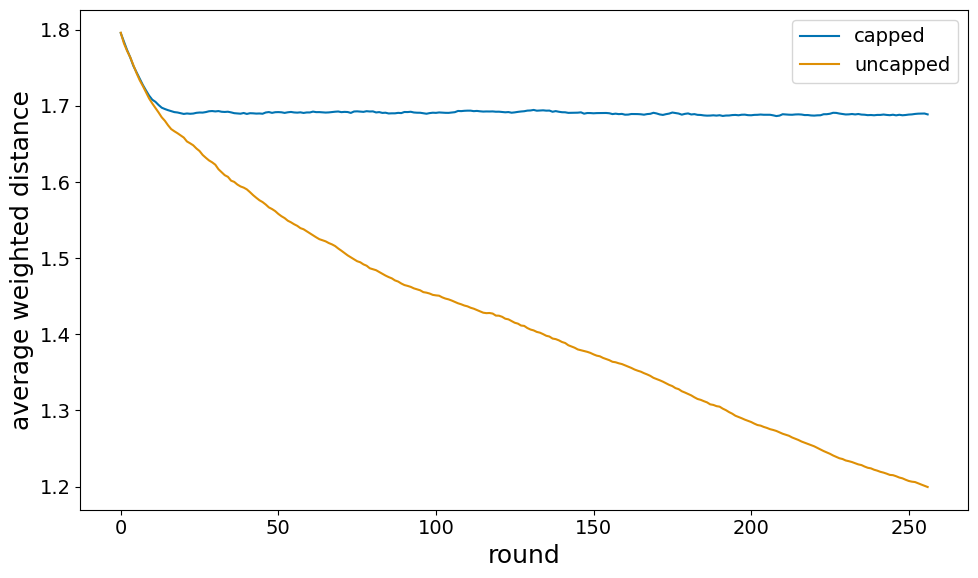

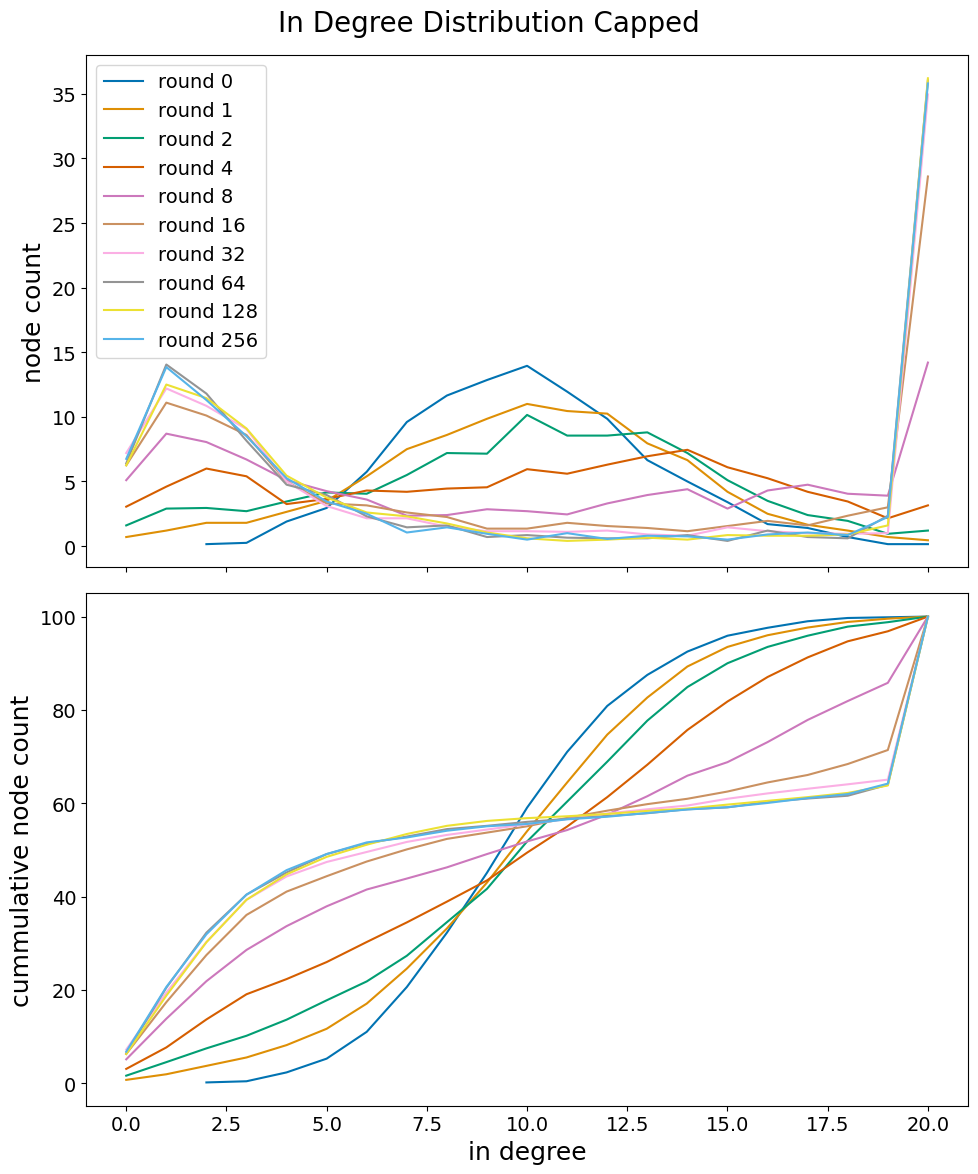

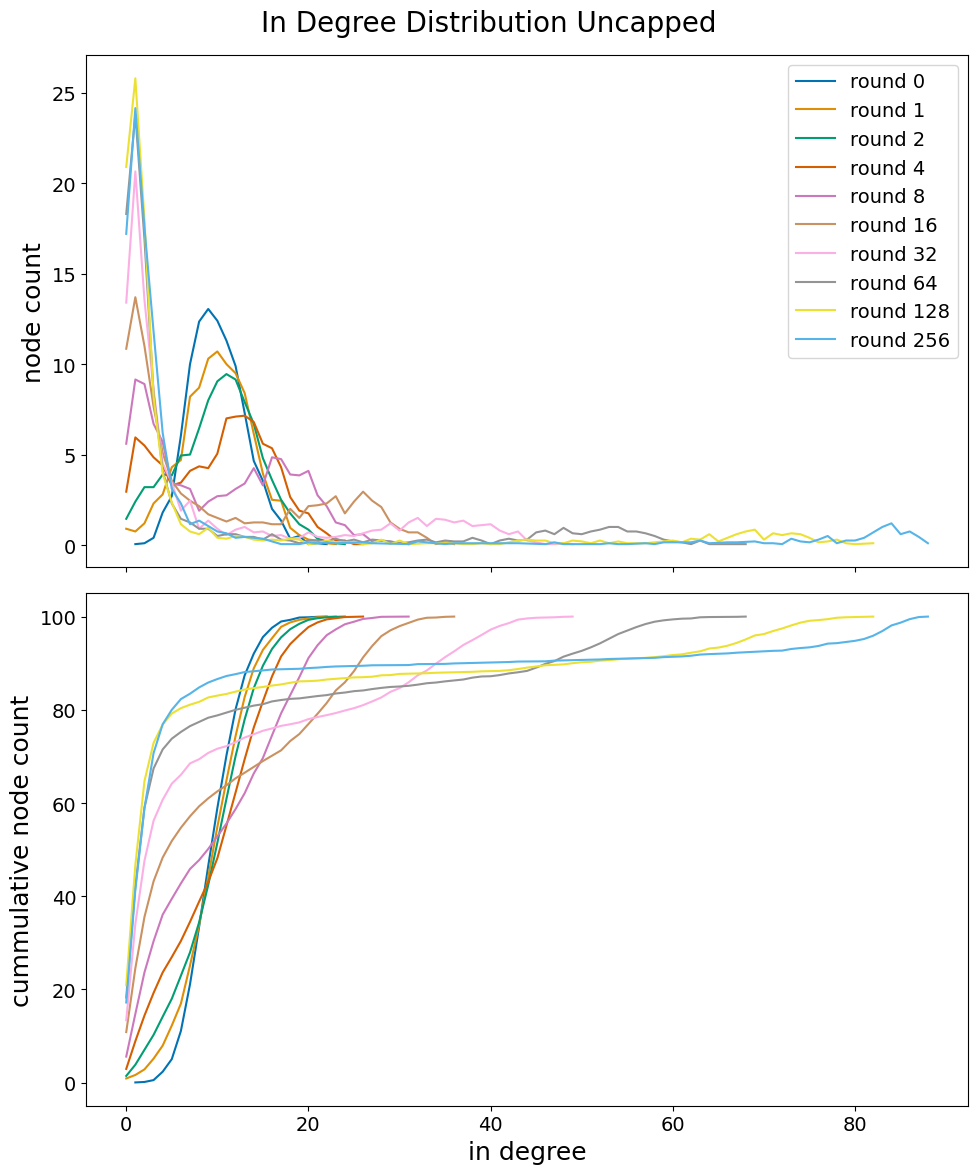

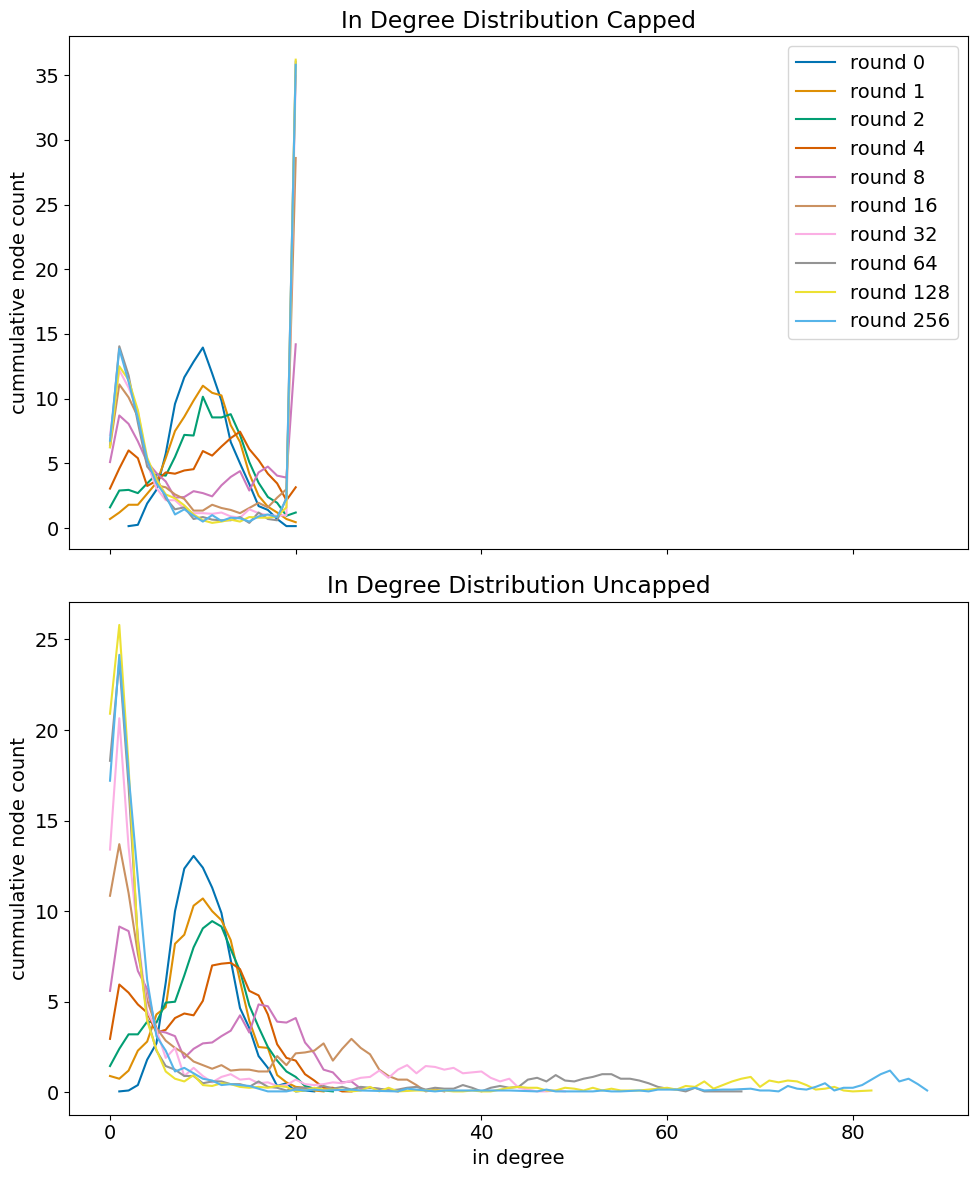

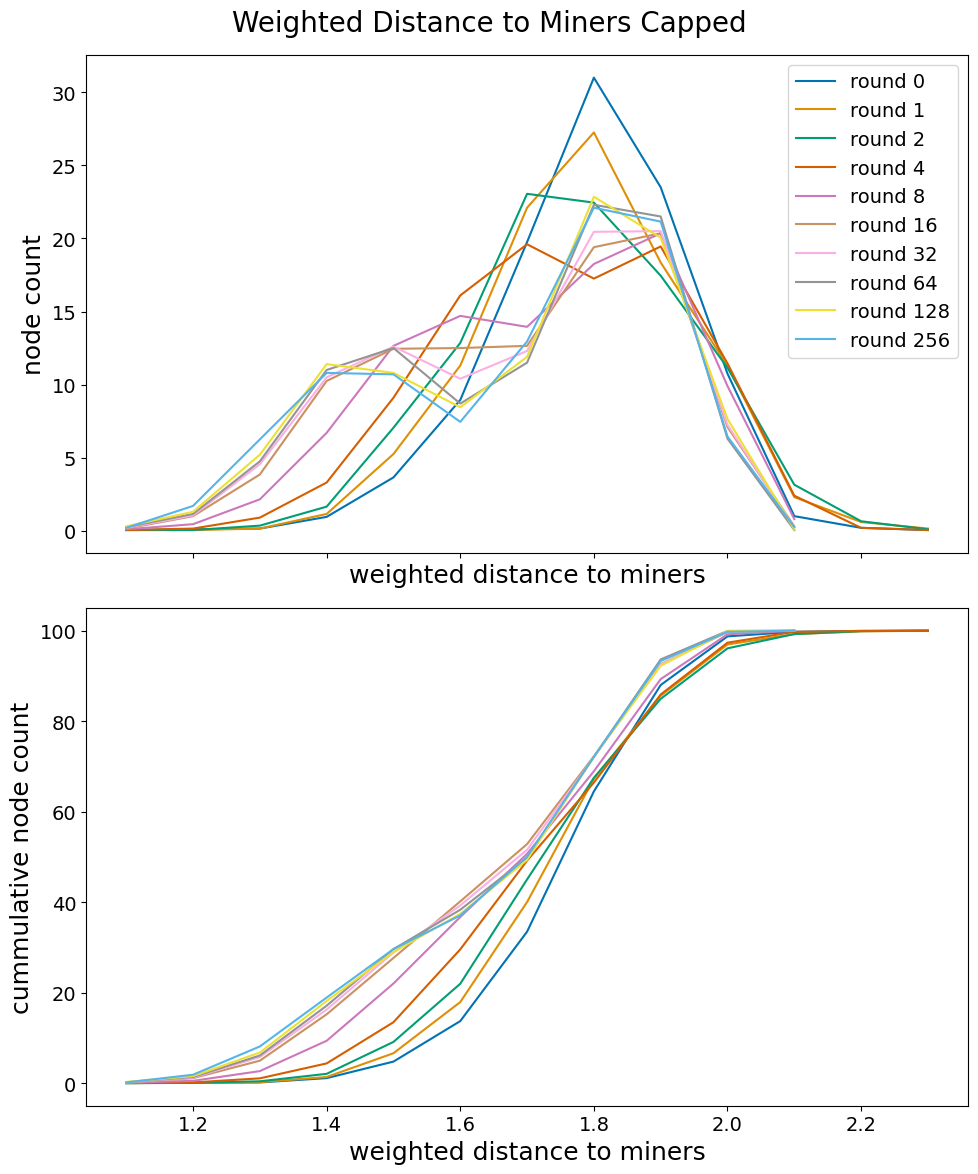

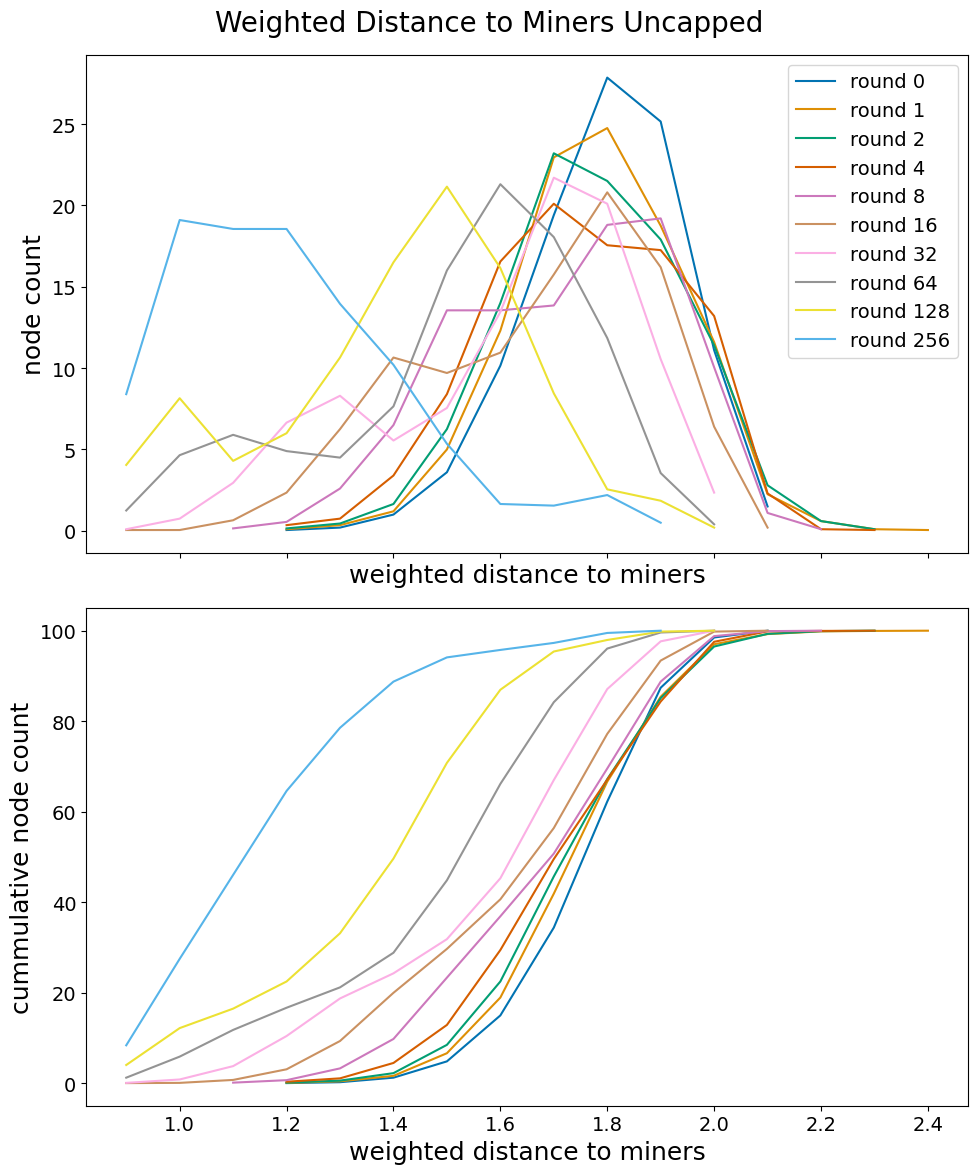

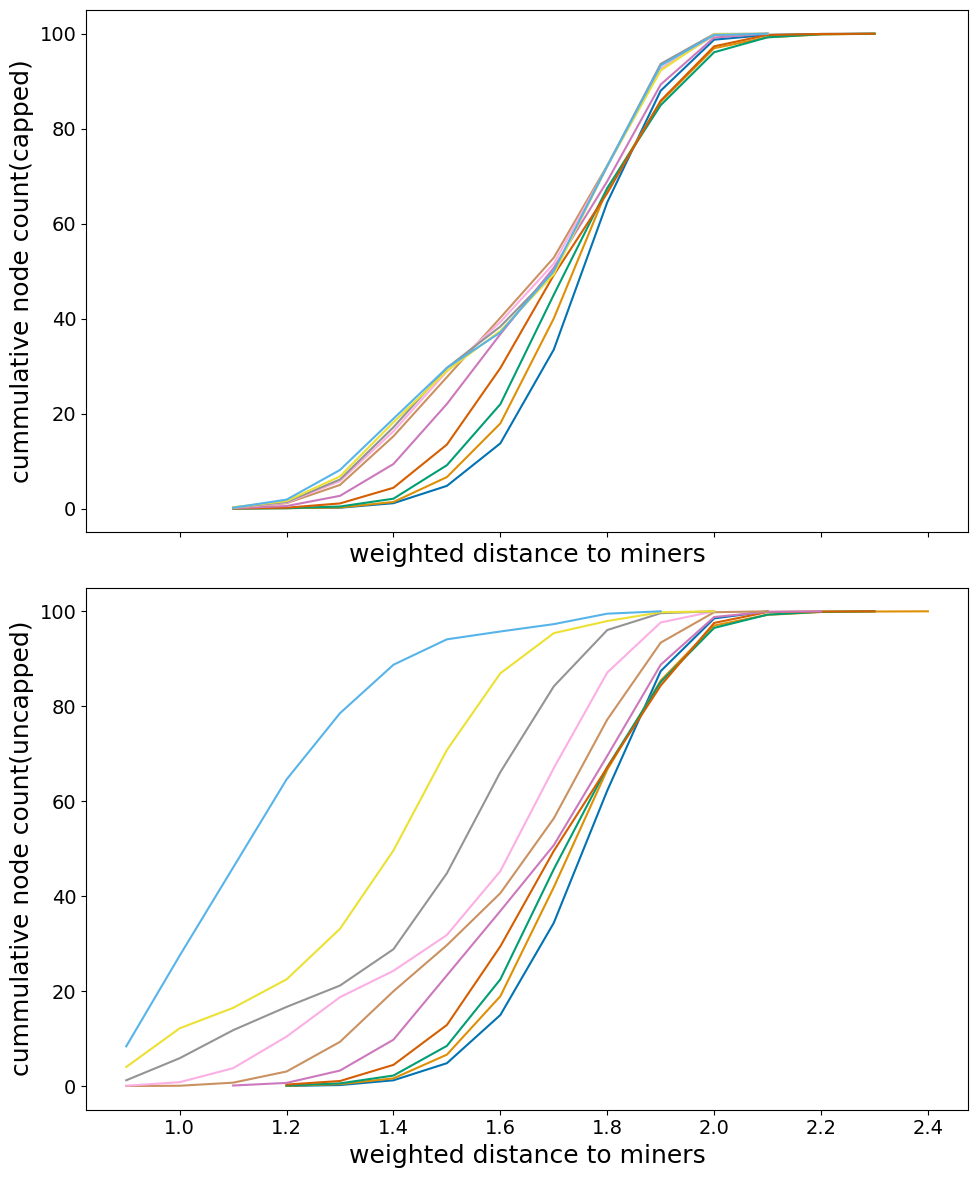

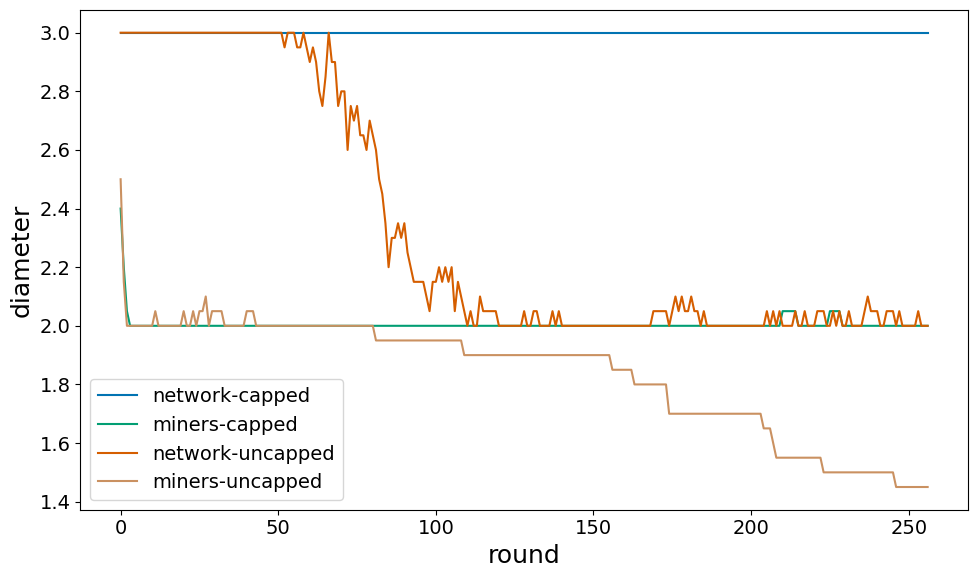

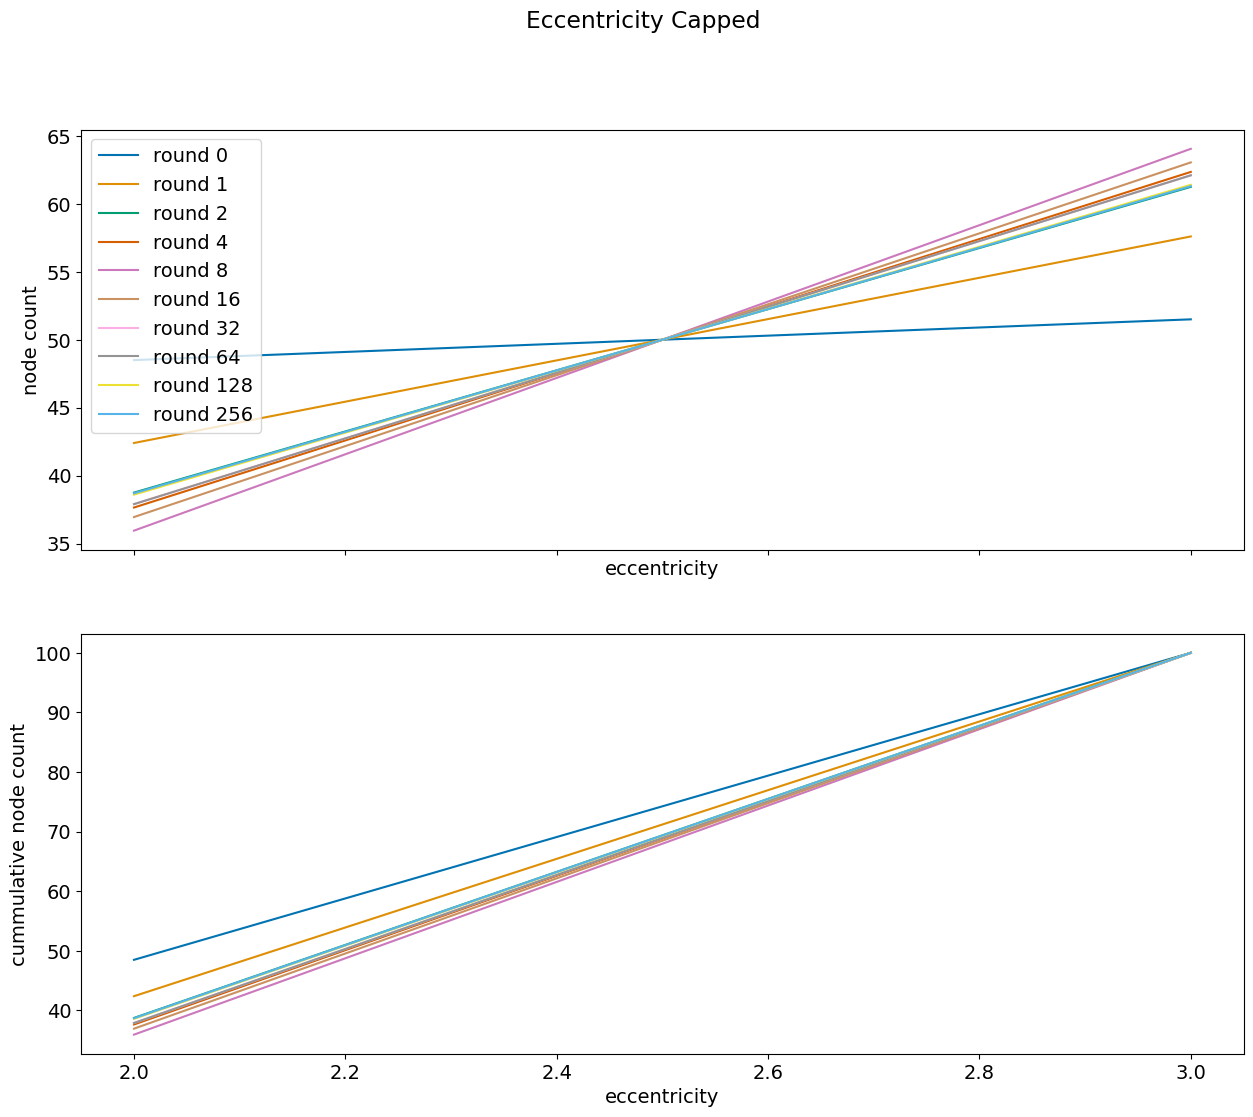

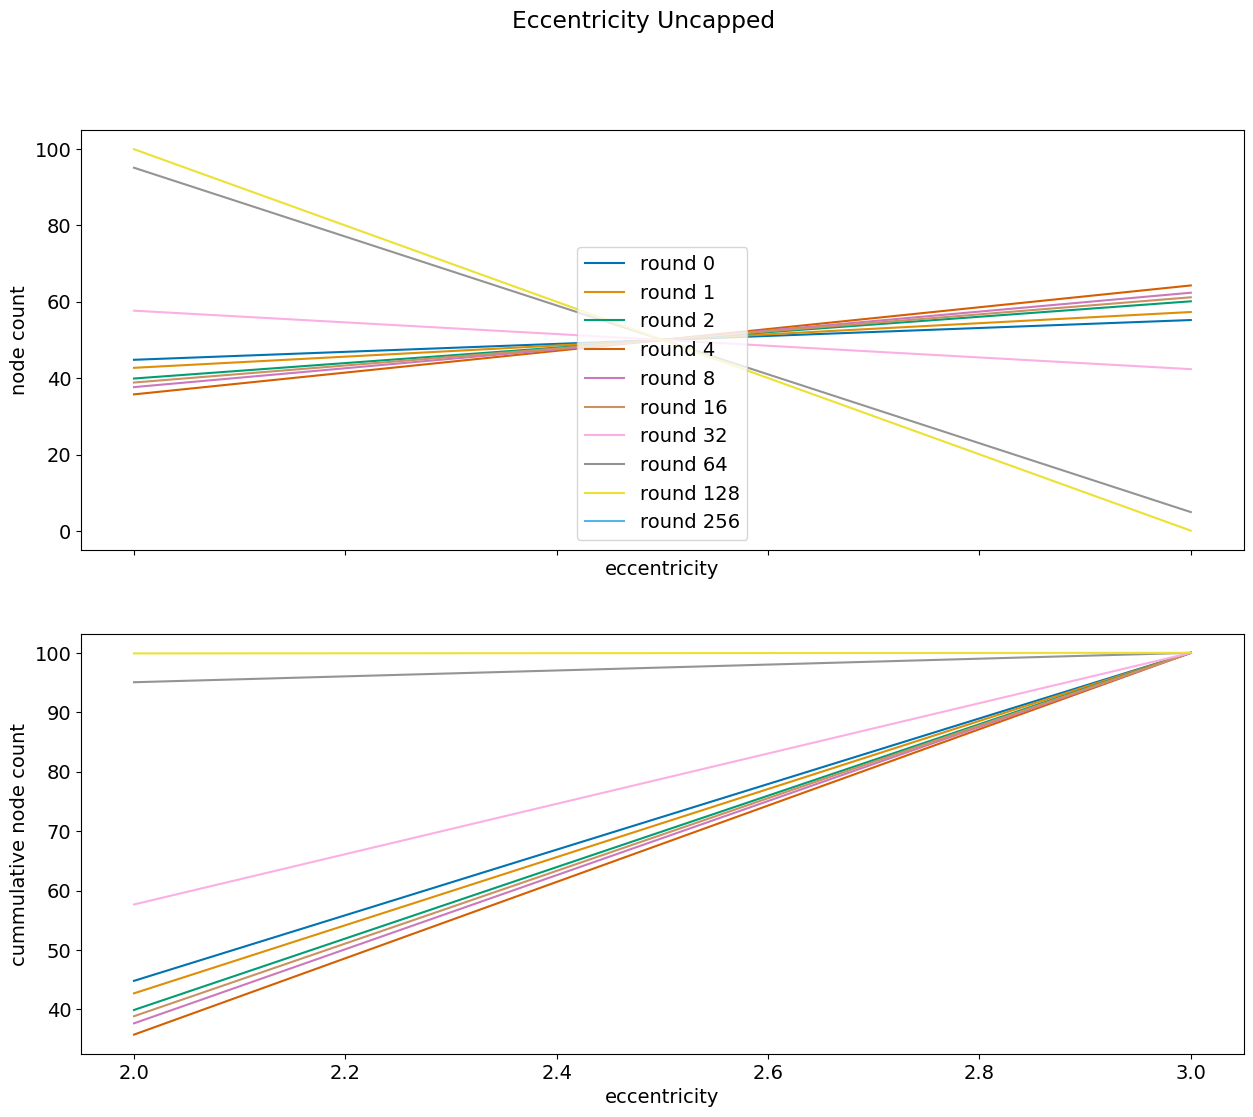

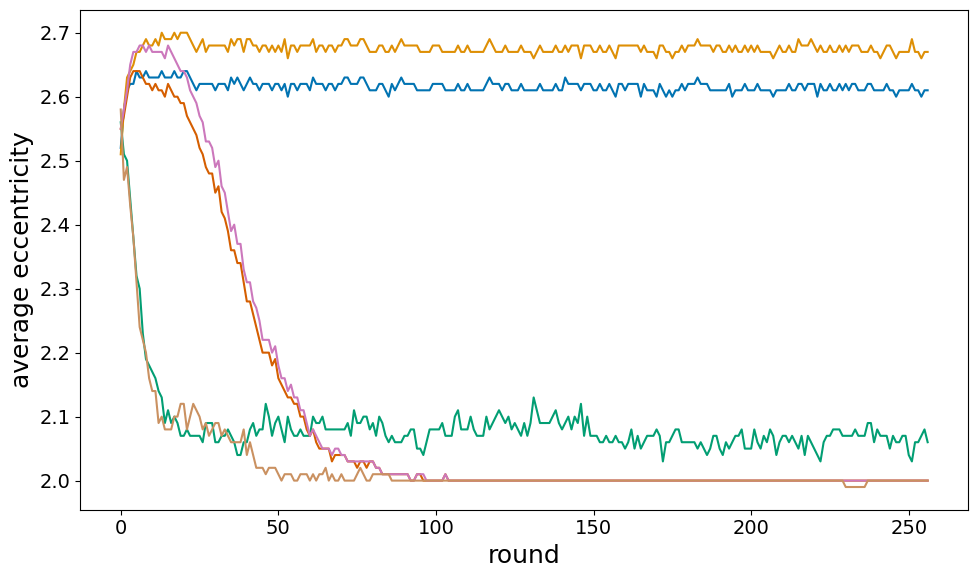

In [12]:
# n= 100, m= 10,
plot_runs(100,10,10,20,256)

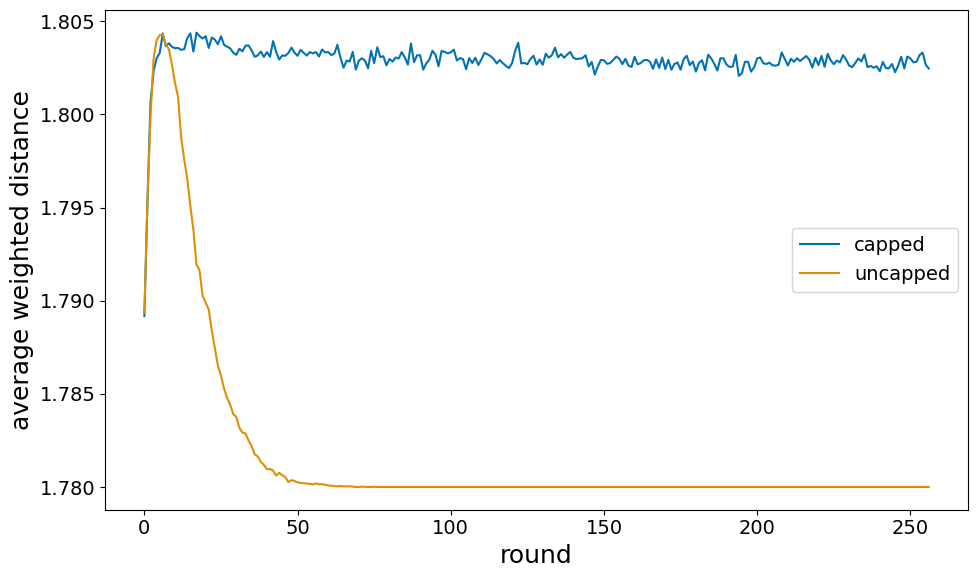

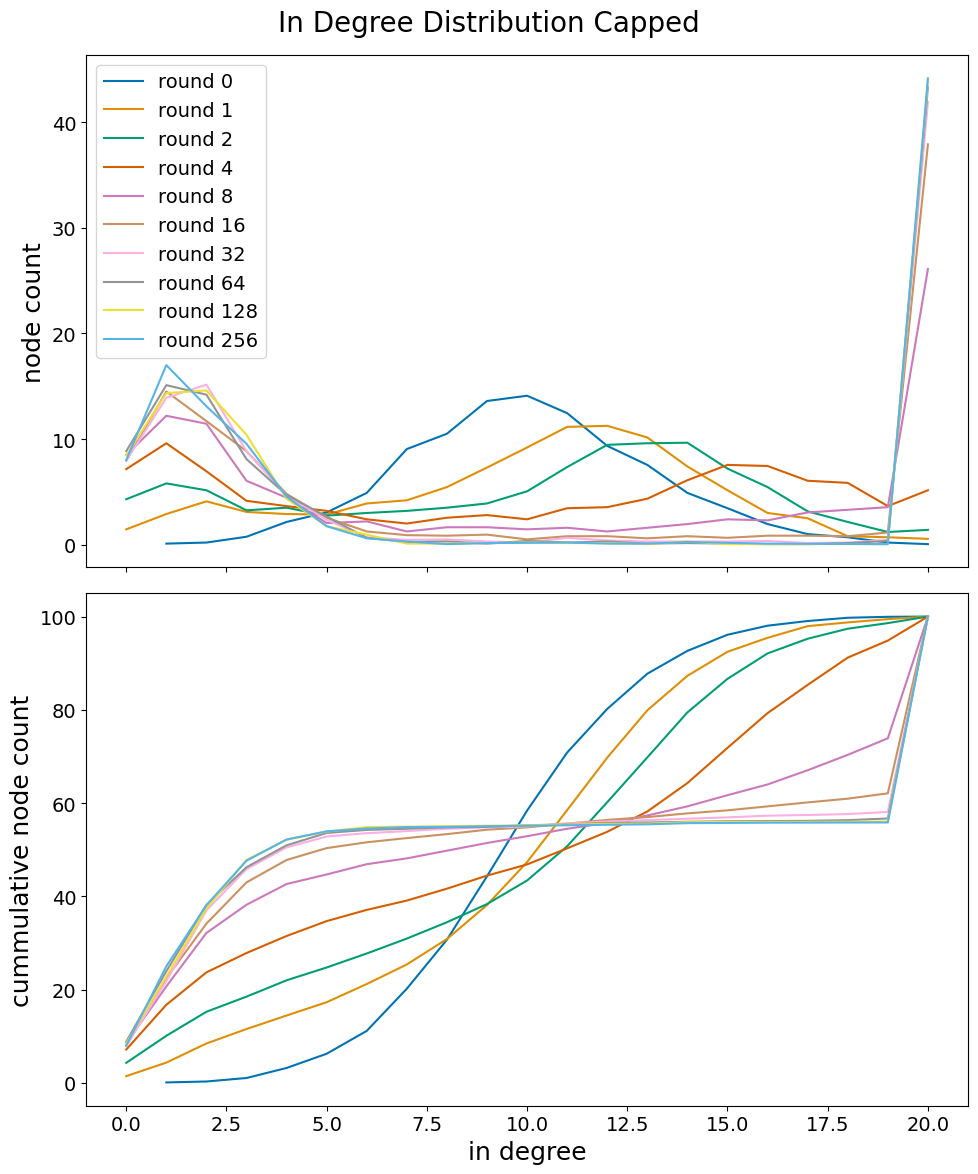

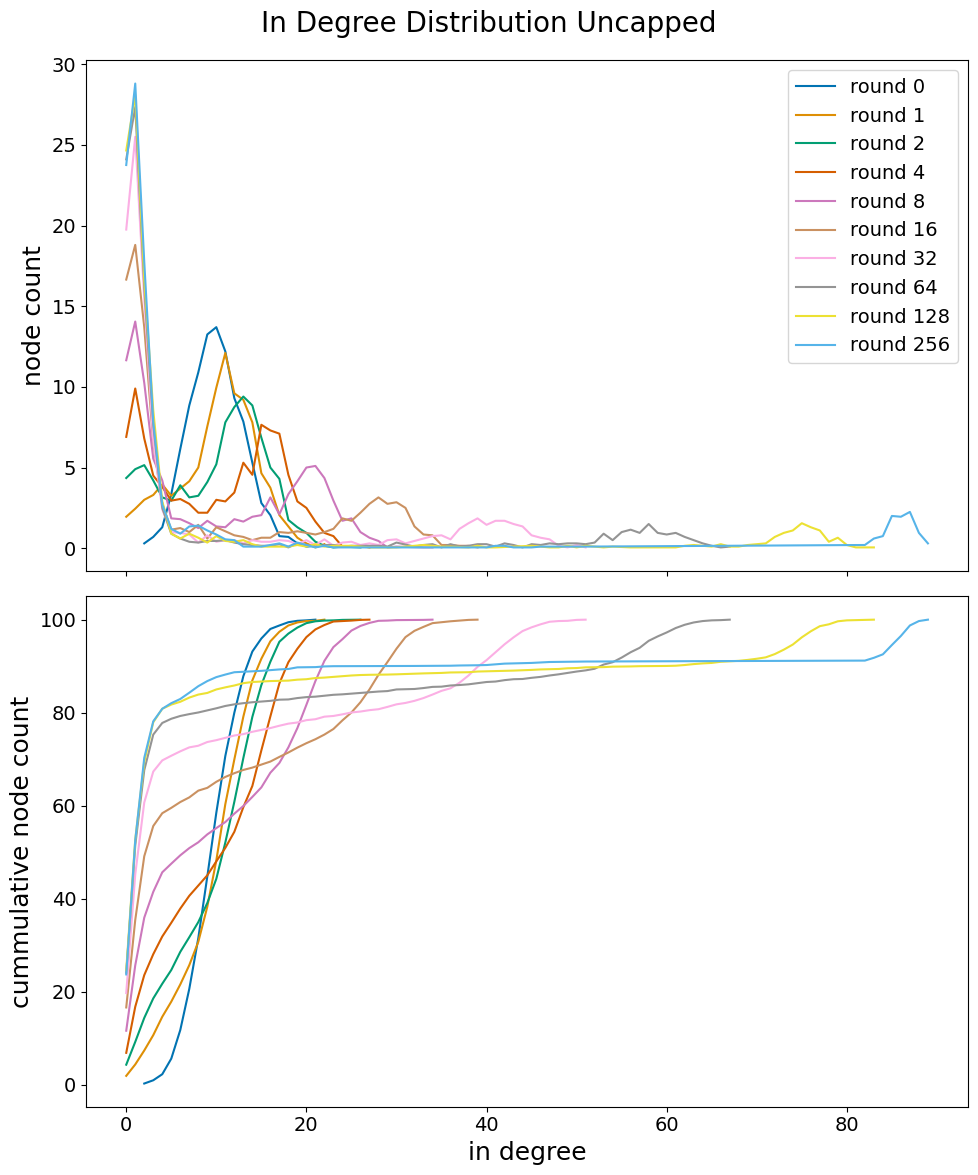

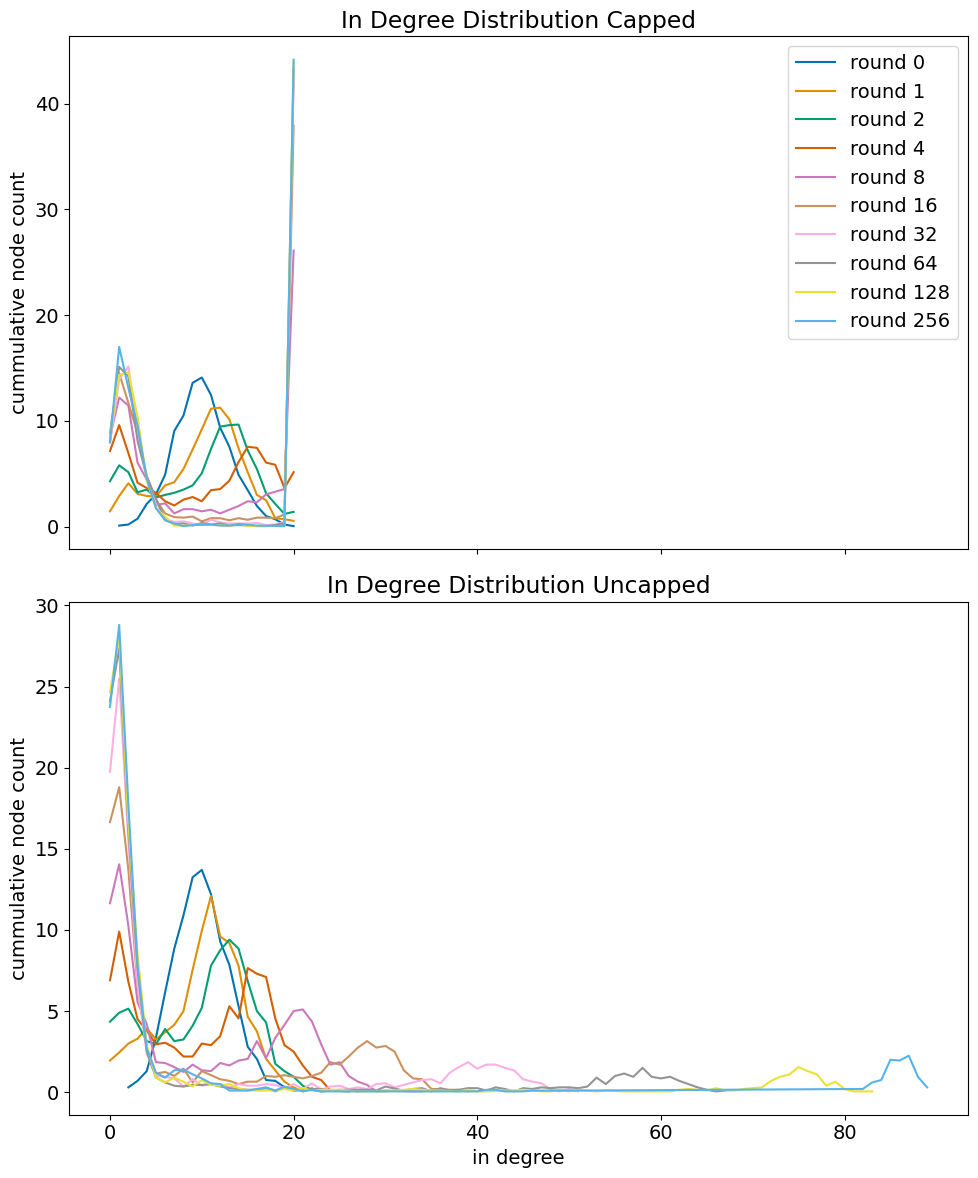

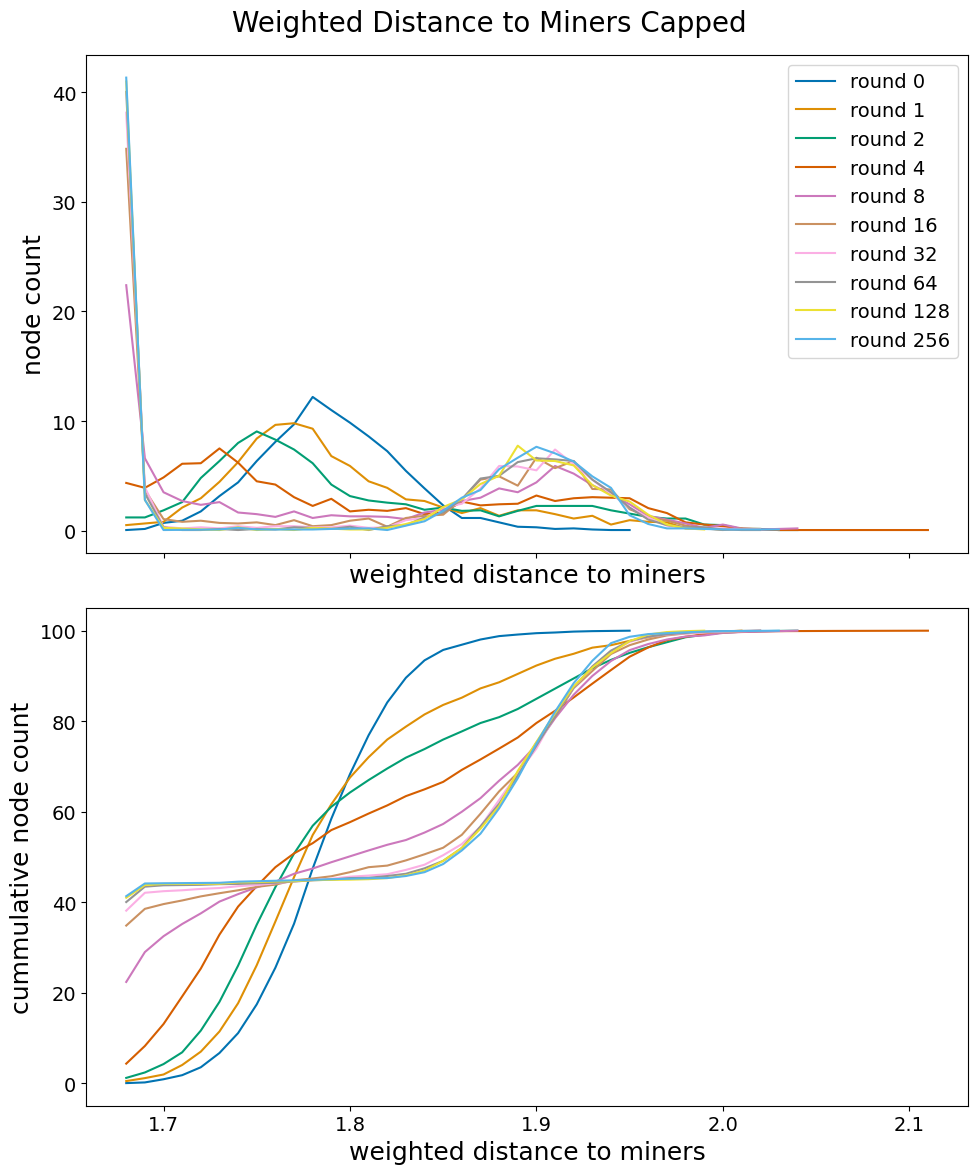

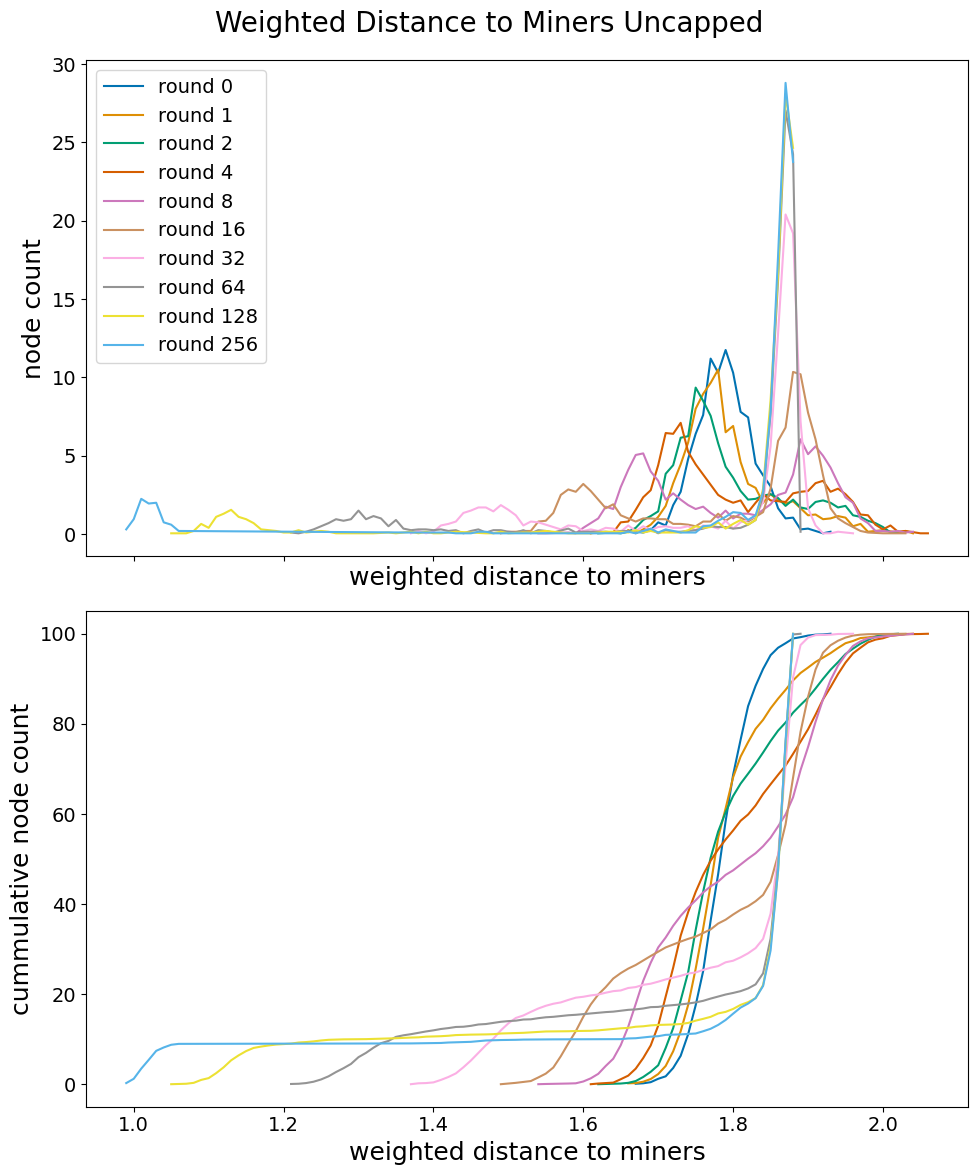

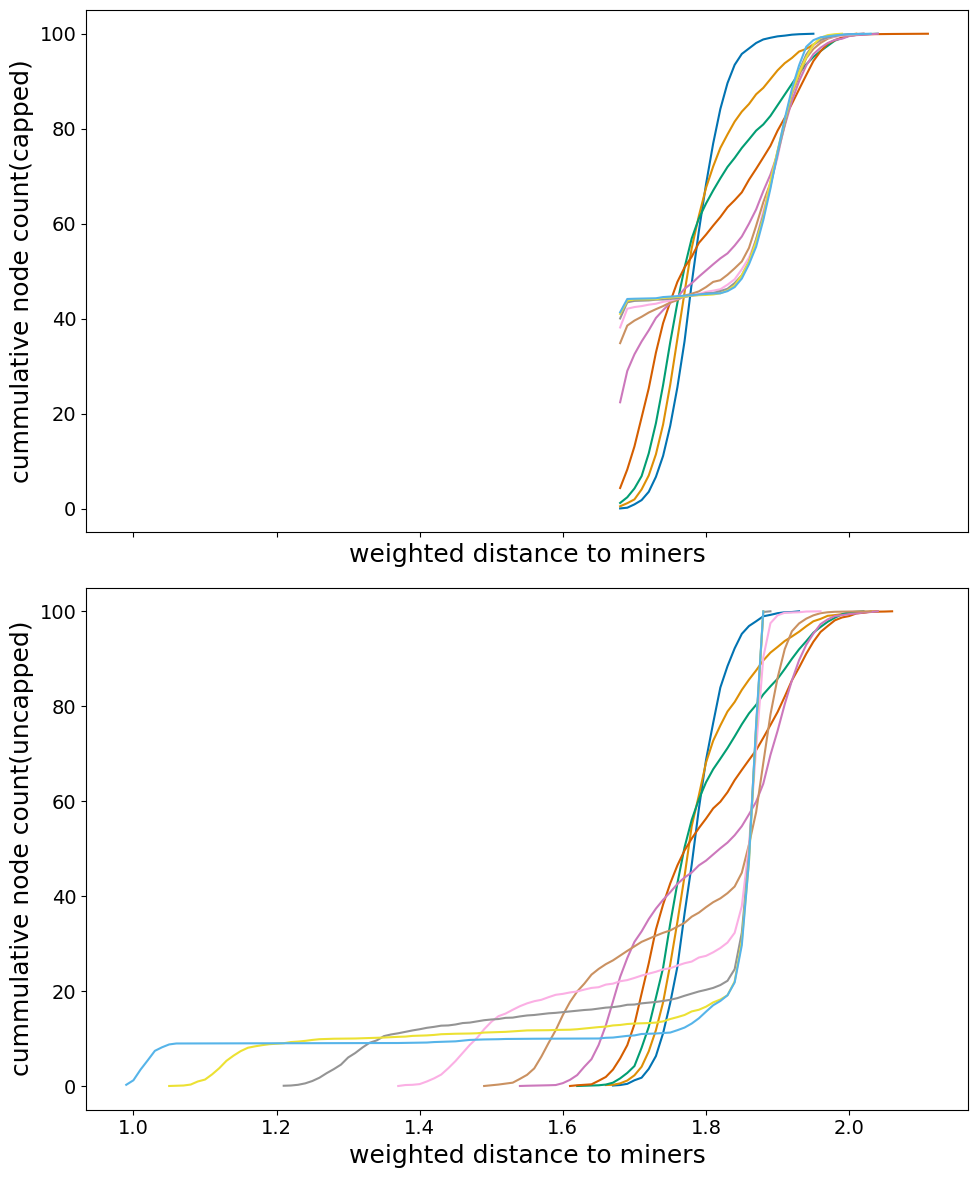

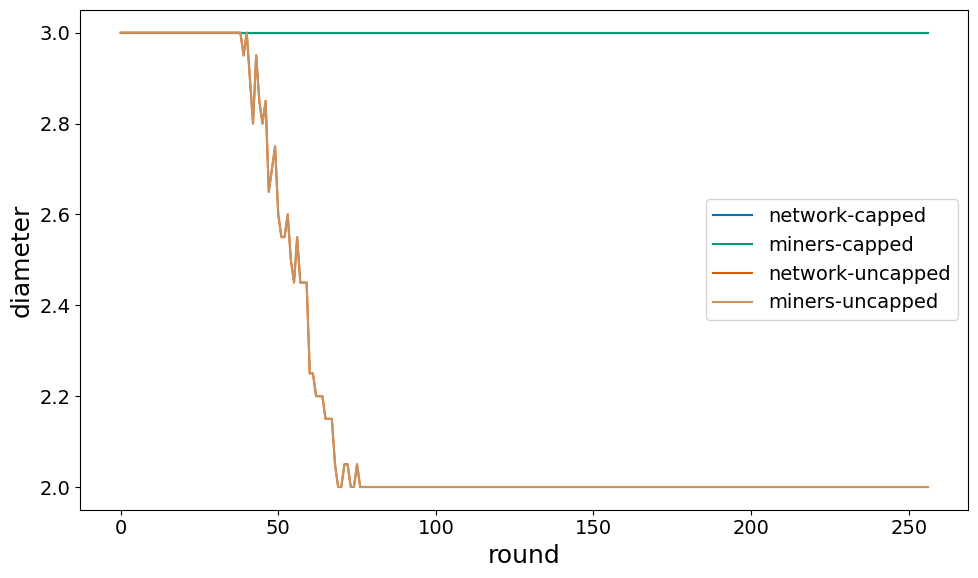

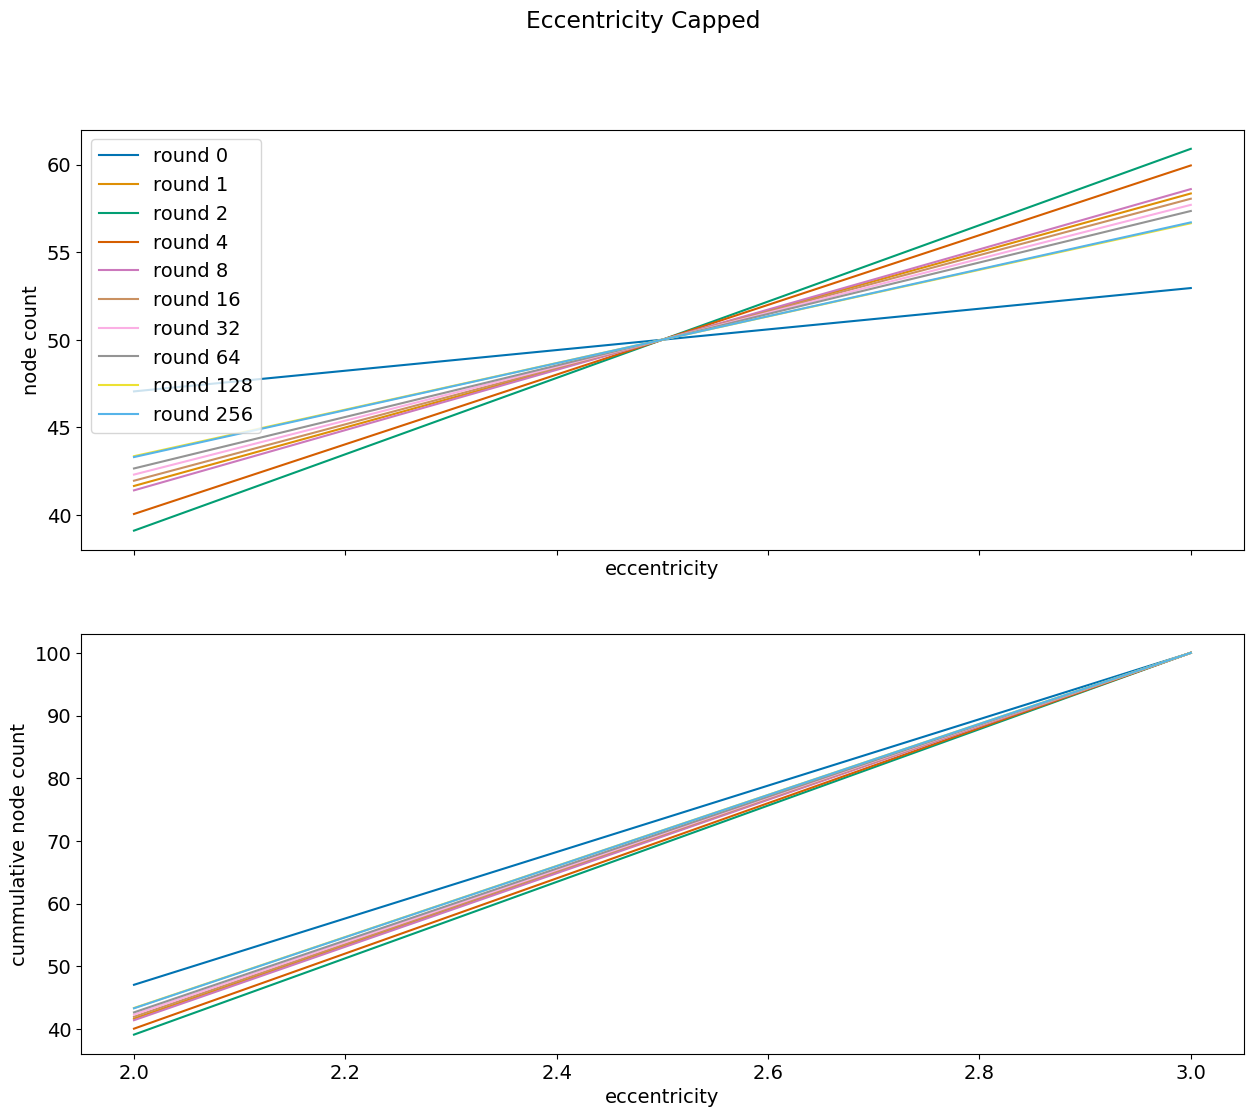

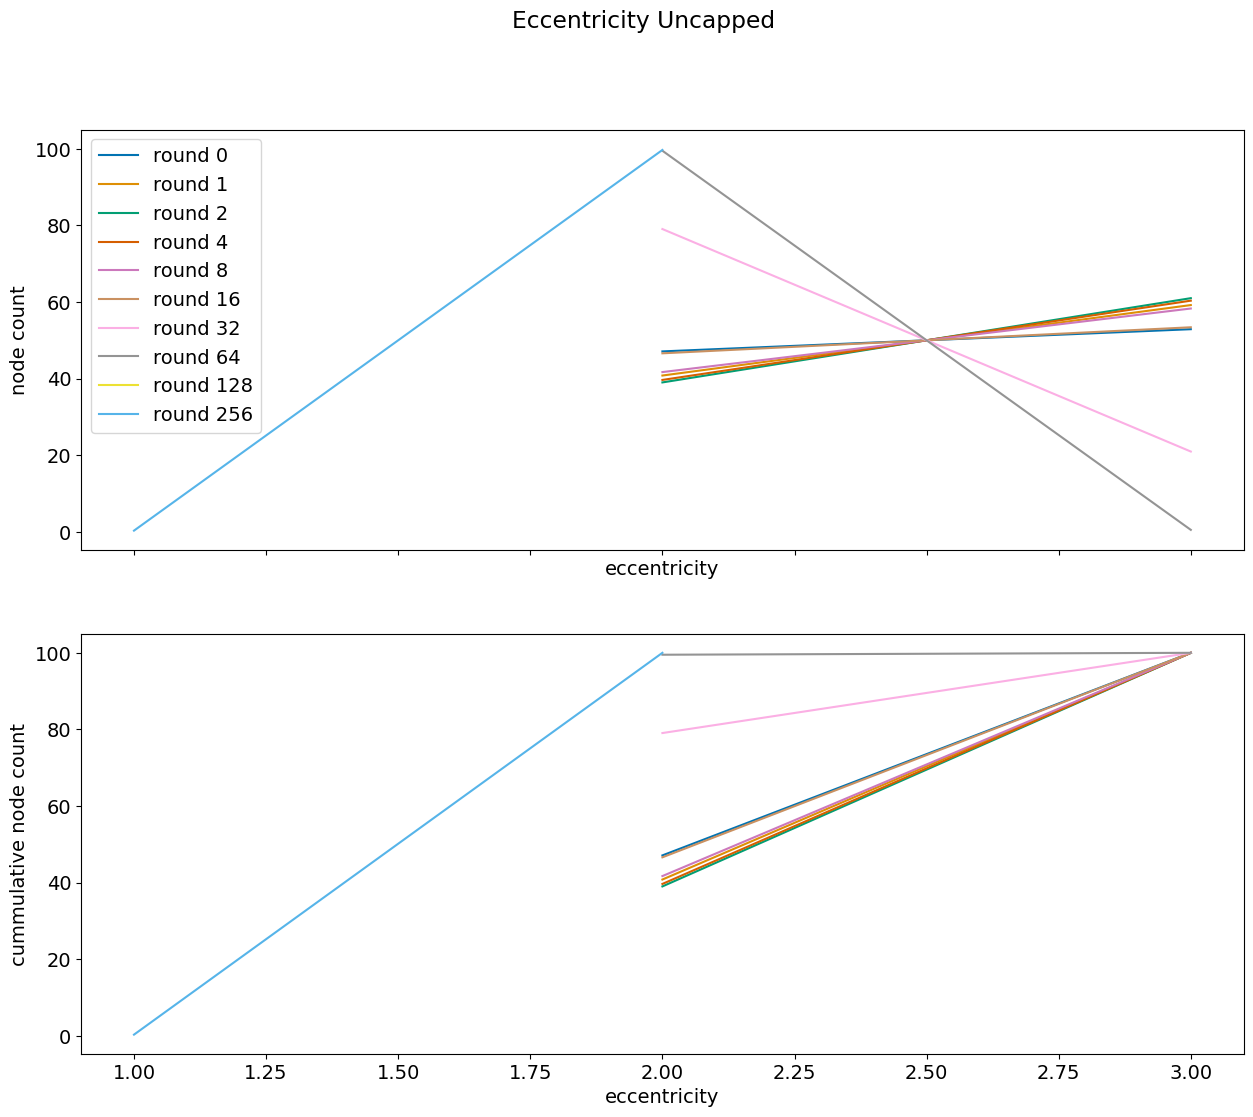

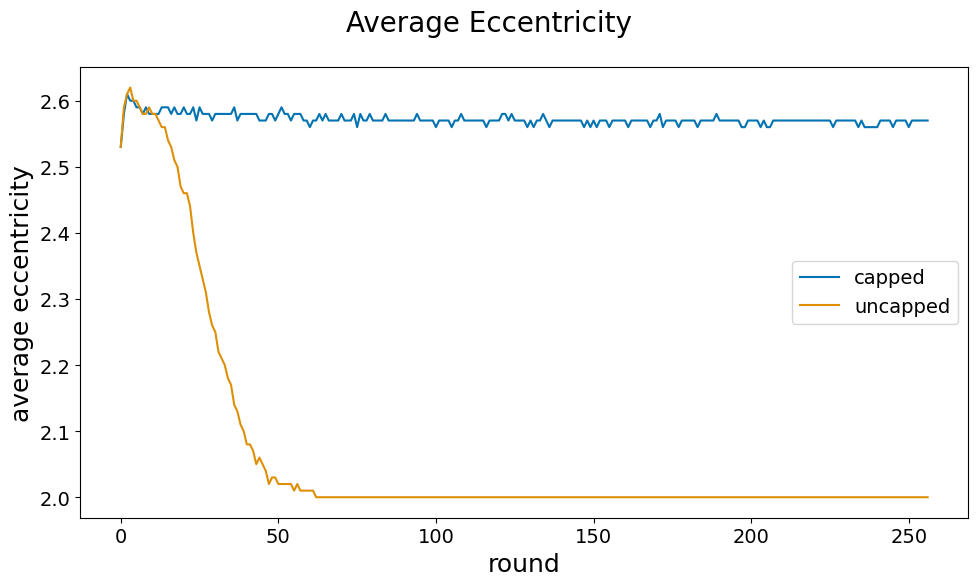

In [13]:
# n= 100, m= 101
plot_runs(100,100,10,20,256)